<a href="https://colab.research.google.com/github/Putt2020/pytorch_beginner/blob/main/heart_disease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
%matplotlib inline

In [91]:
random_state = 41

#Data Prep

In [33]:
# Visit https://www.kaggle.com/datasets/krishujeniya/heart-diseae/data
"""
Columns Description form Kaggle
target: 1 if the patient has heart disease, 0 otherwise
age: Age of the patient (in years)
sex: Sex of the patient (1 = male, 0 = female)
cp: Chest pain type (1-4)
trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
chol: Serum cholesterol in mg/dl
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results (0-2)
thalach: Maximum heart rate achieved
exang: Exercise-induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
"""
df = pd.read_csv('/content/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
describe = df.describe()
describe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
wide_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
narrow_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


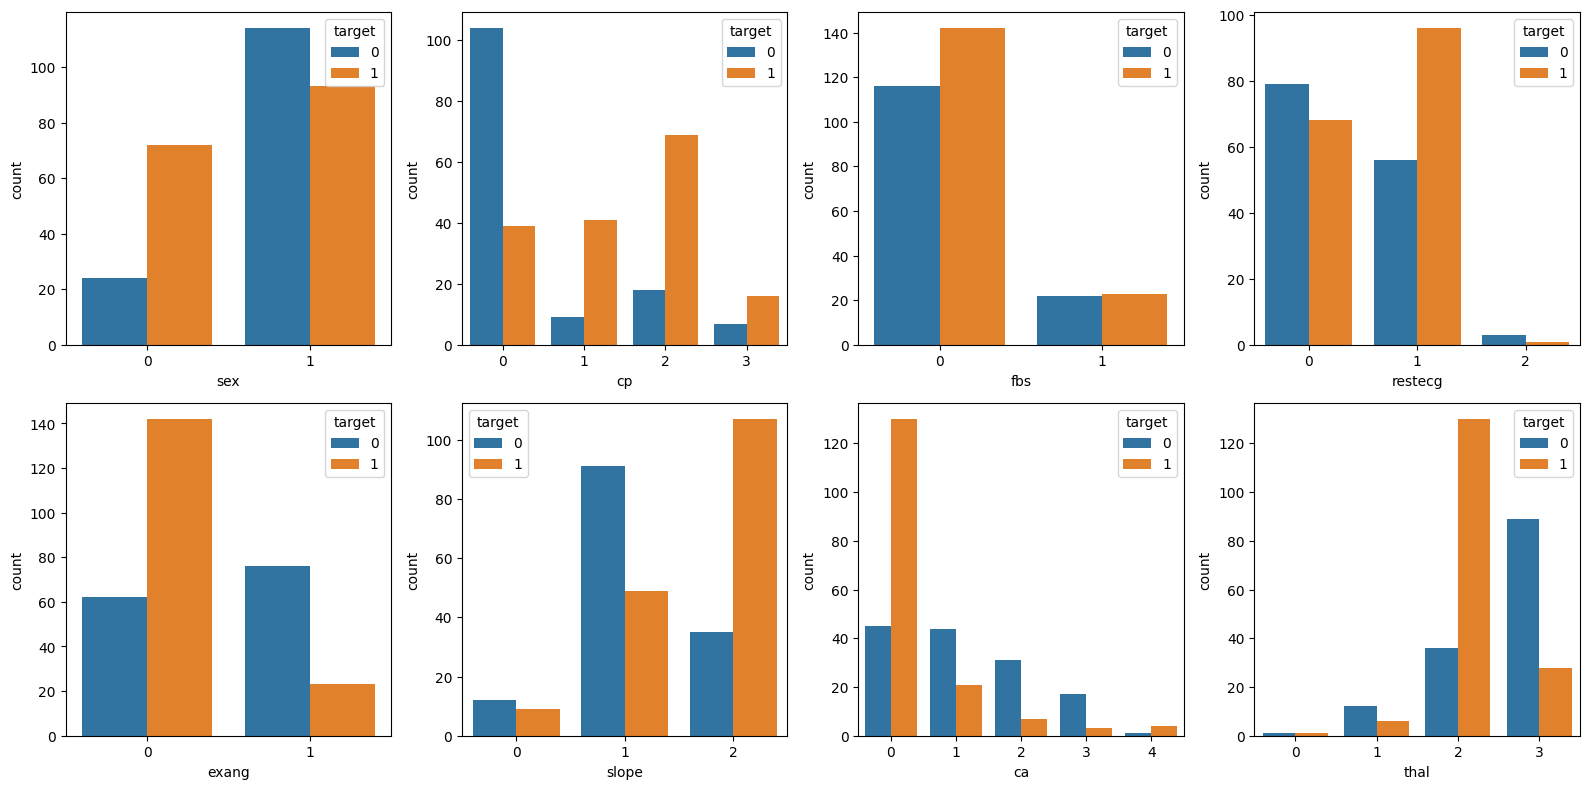

In [17]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
i,j = 0,0
for col in narrow_columns:
  sns.countplot(data=df, x=col, hue='target', ax=axs[i,j], legend='auto')
  j+=1
  if j>3:
    j=0
    i+=1
plt.tight_layout()

<Axes: >

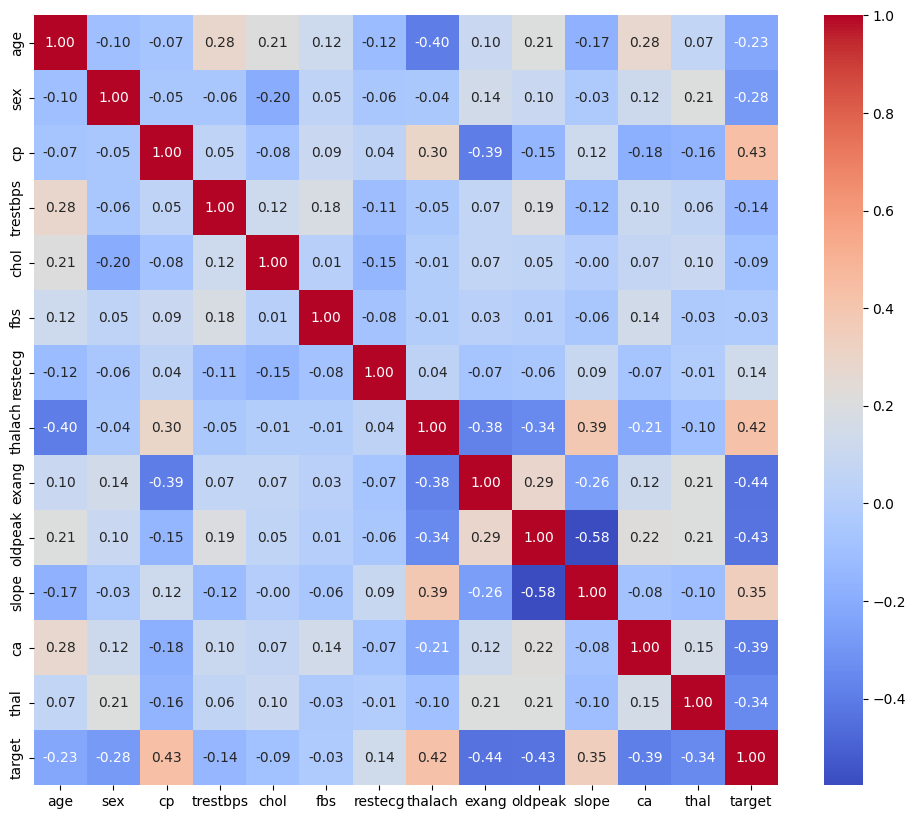

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
# plt.show()

<Axes: xlabel='slope', ylabel='oldpeak'>

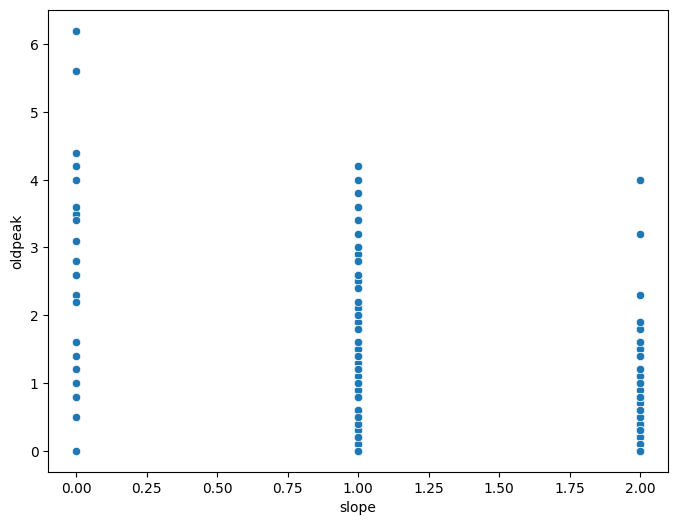

In [26]:
# Take a peak at oldpeak and slope
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='slope', y='oldpeak', ax=ax)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, stratify=df['target'], random_state=random_state)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242,) (61,)


#Model part

In [30]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv  # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

##Decision Tree

###All feature

In [92]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 7, 10]}
base_estimator = DecisionTreeClassifier(random_state=random_state)
# X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, #resource='n_estimators',
                         max_resources=40).fit(X_train, y_train)
display(sh.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=41)

In [97]:
dtree = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=random_state)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
imp_col = X_train.columns[dtree.feature_importances_ > 0.03]
print(classification_report(y_test,predictions))
print(f"importance feature are: {dtree.feature_importances_}")
print(f"importance columms are: {imp_col}")

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        28
           1       0.73      0.73      0.73        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

importance feature are: [0.06239333 0.0560209  0.31504166 0.04196953 0.12753368 0.01521555
 0.         0.0451743  0.00316991 0.14785549 0.0497701  0.04063983
 0.09521573]
importance columms are: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


###Selected feature(could be worse or better)

In [98]:
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 7, 10]}
base_estimator = DecisionTreeClassifier(random_state=random_state)
# X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, # resource='n_estimators',
                         max_resources=40).fit(X_train[imp_col], y_train)
display(sh.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=41)

In [99]:
dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=random_state)
dtree.fit(X_train[imp_col],y_train)
predictions = dtree.predict(X_test[imp_col])
print(classification_report(y_test,predictions))
print(f"importance feature are: {dtree.feature_importances_}")
print(f"importance columms are: {imp_col[dtree.feature_importances_ > 0.03]}")

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

importance feature are: [0.04075956 0.02801846 0.38675255 0.03036056 0.01468102 0.0670795
 0.18554069 0.05387763 0.07604098 0.11688907]
importance columms are: Index(['age', 'cp', 'trestbps', 'thalach', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


##Linear Regression

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



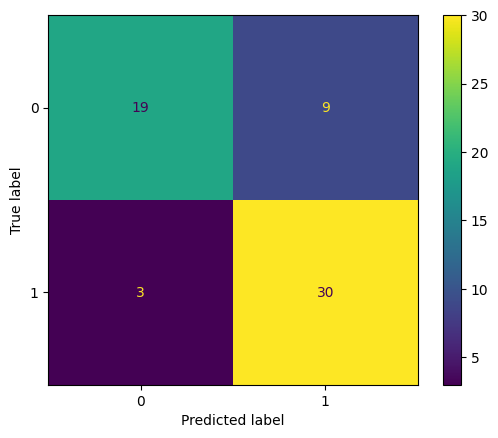

In [102]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,predictions))

##Random Forest

In [103]:
param_grid = {'max_depth': [3, 5, 7, 10, 2],
              'min_samples_split': [2, 5, 7, 10, 3]}
base_estimator = RandomForestClassifier(random_state=random_state)
# X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=3, resource='n_estimators',
                         max_resources=40).fit(X_train, y_train)
display(sh.best_estimator_)

RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=36,
                       random_state=41)

              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



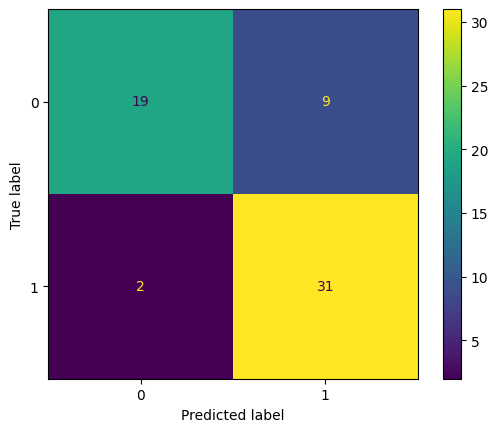

In [104]:
# prompt: Train Randomforestclassifier
rf = RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=36, random_state=random_state)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,predictions))

##XGBoost

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



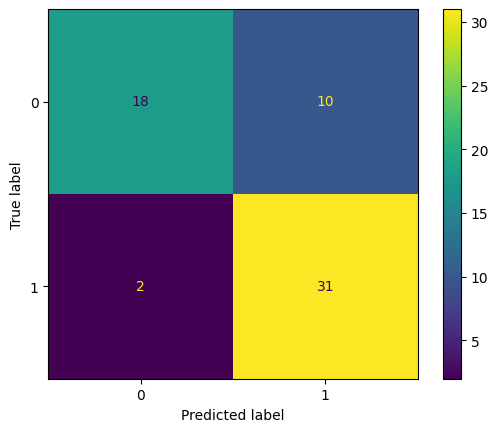

In [105]:
model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,predictions))

##Nueral Network

In [139]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [176]:
class NNModel(nn.Module):
    in_features = 13
    hidden1 = 100
    hidden2 = 50
    hidden3 = 20
    out_features = 2

    def __init__(self):
        super(NNModel, self).__init__()
        self.lin1 = nn.Linear(self.in_features, self.hidden1)
        self.lin2 = nn.Linear(self.hidden1, self.hidden2)
        self.lin3 = nn.Linear(self.hidden2, self.hidden3)
        self.out = nn.Linear(self.hidden3, self.out_features)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        self.dropout(x)
        x = F.relu(self.lin3(x))
        x = self.out(x)
        return x

In [177]:
torch.manual_seed(random_state)
model = NNModel()

In [178]:
criteria = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=50, gamma=0.5)

In [179]:
X_train_tensor = torch.FloatTensor(X_train.values)
X_test_tensor = torch.FloatTensor(X_test.values)
y_train_tensor = torch.LongTensor(y_train.values)
y_test_tensor = torch.LongTensor(y_test.values)

In [185]:
X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor = train_test_split(X_train_tensor, y_train_tensor, test_size=0.15, random_state=random_state)
print(X_train_tensor.shape, X_val_tensor.shape, y_train_tensor.shape, y_val_tensor.shape)

torch.Size([205, 13]) torch.Size([37, 13]) torch.Size([205]) torch.Size([37])


In [180]:
epochs = 300
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train_tensor) #Go forward and get prediction
    loss = criteria(y_pred, y_train_tensor) #Measure error/loss, should be lower each epoch
    losses.append(loss.detach().numpy()) #Tracking loss

    if i % 5 == 4:
        print(f"Epoch {i+1} has loss: {loss}")

    # These process will back propagation weight for fine tune layers
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

Epoch 5 has loss: 2.2428112030029297
Epoch 10 has loss: 0.7708272337913513
Epoch 15 has loss: 0.6952832937240601
Epoch 20 has loss: 0.6628780961036682
Epoch 25 has loss: 0.6332396268844604
Epoch 30 has loss: 0.6139129996299744
Epoch 35 has loss: 0.5949566960334778
Epoch 40 has loss: 0.7595431804656982
Epoch 45 has loss: 0.5929897427558899
Epoch 50 has loss: 0.5983740091323853
Epoch 55 has loss: 0.5721908807754517
Epoch 60 has loss: 0.5612343549728394
Epoch 65 has loss: 0.5508817434310913
Epoch 70 has loss: 0.5419051051139832
Epoch 75 has loss: 0.5337759852409363
Epoch 80 has loss: 0.5257955193519592
Epoch 85 has loss: 0.5190746784210205
Epoch 90 has loss: 0.5118711590766907
Epoch 95 has loss: 0.5038682222366333
Epoch 100 has loss: 0.49491792917251587
Epoch 105 has loss: 0.48912513256073
Epoch 110 has loss: 0.4838530719280243
Epoch 115 has loss: 0.4782235622406006
Epoch 120 has loss: 0.47222283482551575
Epoch 125 has loss: 0.46575385332107544
Epoch 130 has loss: 0.4588618278503418
Epoch

Text(0.5, 0, 'Epoch')

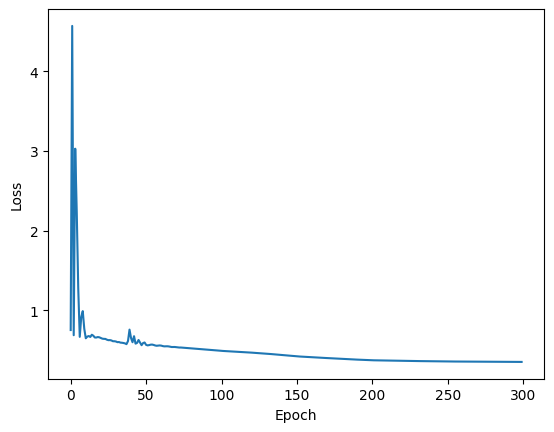

In [181]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [183]:
correct = 0
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test_tensor):
        #predict data
        y_val = y_test_tensor[i]
        y_hat = model.forward(data)
        predictions.append(y_hat.argmax().item())

        #show result
        # print(f"{i}\t{y_hat}\t{y_val} or {'risky' if y_val == 1 else 'not risky'}")

        #eval correctness
        if y_hat.argmax().item() == y_val.item():
            correct += 1

predictions = np.array(predictions)
print(f"Accuracy: {correct/len(y_test)}")

Accuracy: 0.8524590163934426


              precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.87      0.85      0.85        61



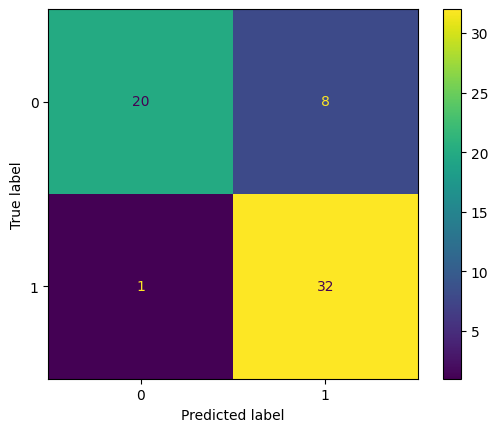

In [184]:
cm = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,predictions))